In [1]:
#importing required modules

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Perceptron training

In [3]:
#generating linearly seperable data by the lines 10x+2y=3 and 10x+2y=4
#md denotes modified data which does not contain points between above 2 lines

In [4]:
Data = np.random.rand(2000,2)
md = np.empty((0,2))
for i in range(len(Data)):
    if(10*Data[i,0]+2*Data[i,1]<3 or 10*Data[i,0]+2*Data[i,1]>4):
        md = np.append(md,[[Data[i,0],Data[i,1]]],axis=0)

print(md.shape)

(1801, 2)


In [5]:
#plotting modified data(i.e linearly seperable data)

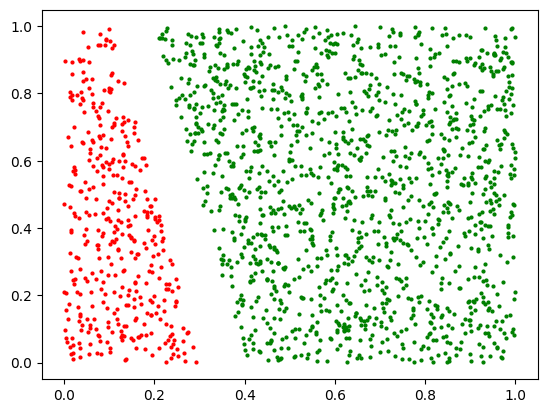

In [6]:
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        plt.scatter(md[i,0],md[i,1],c='r',s=4)
    else:
        plt.scatter(md[i,0],md[i,1],c='g',s=4)
        
plt.show()

In [7]:
#adding extra dimesion to input data

In [8]:
one = np.full(shape=(len(md),1),fill_value=1.0)
X = np.append(md,one,axis=1)
print(X.shape)

(1801, 3)


In [9]:
#preparing the labels by initially giving 1 as label to everything and then modifying it to -1 for red points

In [10]:
Y = np.full(shape=(len(md),1),fill_value=1)
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        Y[i,0]=-1
print(Y.shape)

(1801, 1)


In [11]:
#initialise w with all zeroes(data is 2d..hence 3 parametres in w)

In [12]:
W = np.array([0,0,0])

In [13]:
#plotting data and w before training

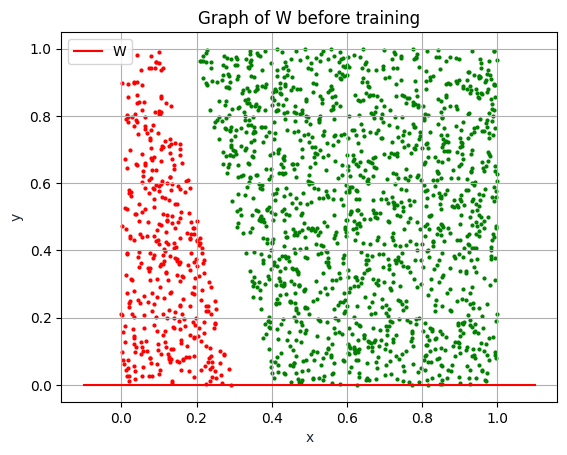

In [14]:
x = np.linspace(-0.1,1.1,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        plt.scatter(md[i,0],md[i,1],c='r',s=4)
    else:
        plt.scatter(md[i,0],md[i,1],c='g',s=4)
plt.grid()
plt.show()

In [15]:
#the perceptron training algorithm
#returns list containing number of total updates to w  and w

In [16]:
def train_perceptron(x, y, w, nb_epochs_max):
  nb_updates = 0
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(len(X)):
      if np.dot(x[i],w) * y[i] <= 0:
        w = np.add(w , y[i] * x[i])
        nb_changes = nb_changes + 1
        nb_updates = nb_updates + 1
    if nb_changes == 0: 
        break;
  list = [nb_updates,w]  
  return list

In [17]:
#call the training algorithm

In [18]:
W = train_perceptron(X,Y, W, 10)[1]
print(W)

[ 3.2310818  0.5061555 -1.       ]


In [19]:
#plotting data and w after training

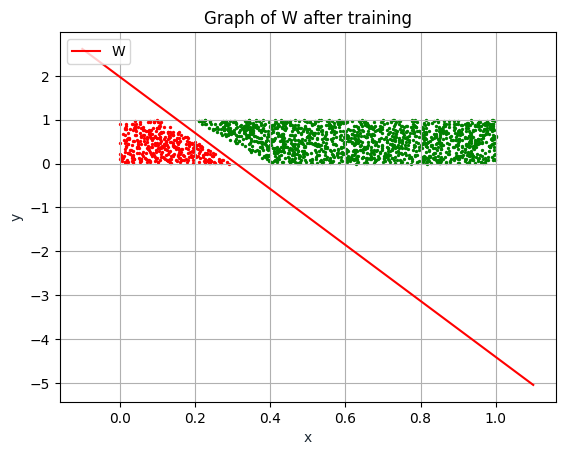

In [20]:
x = np.linspace(-0.1,1.1,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        plt.scatter(md[i,0],md[i,1],c='r',s=2)
    else:
        plt.scatter(md[i,0],md[i,1],c='g',s=2)
plt.grid()
plt.show()

In [21]:
#plotting average no.of iterations required for perfect classification for each vale of level of seperability(a)

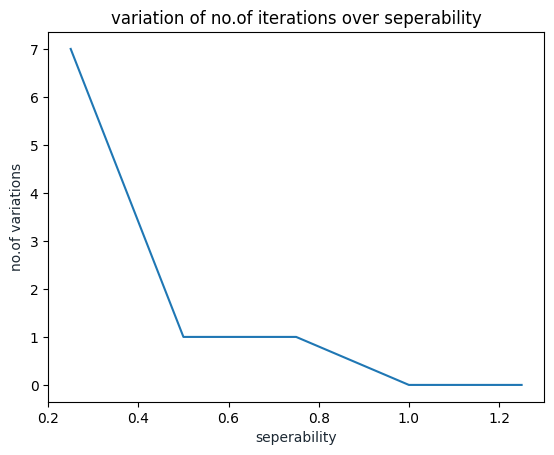

In [22]:
alist = [0.25,0.5,0.75,1,1.25]
klist = []
for a in alist:
   k = 0
   for i in range(5):
     Data = np.random.rand(2000,2)
     md = np.empty((0,2))
     for i in range(len(Data)):    
      if(10*Data[i,0]+2*Data[i,1]<3.5-a*(math.sqrt(104)) or 10*Data[i,0]+2*Data[i,1]>3.5+a*(math.sqrt(104))):
          md = np.append(md,[[Data[i,0],Data[i,1]]],axis=0)
     one = np.full(shape=(len(md),1),fill_value=1.0)
     X = np.append(md,one,axis=1) 
     Y = np.full(shape=(len(md),1),fill_value=1)
     for i in range(len(md)):
        if(10*md[i,0]+2*md[i,1]<3.5-a*(math.sqrt(104))):
            Y[i,0]=-1 
     W = np.array([0,0,0])
     k = k+ (train_perceptron(X,Y, W, 10)[0])/5
   klist.append(k)

plt.plot(alist,klist)
plt.ylabel('no.of variations', color='#1C2833')
plt.xlabel('seperability', color='#1C2833')
plt.title('variation of no.of iterations over seperability')
plt.show()

In [23]:
#Analysis
# We clearly observe that the number of iterations required for perfect classification
# decreases as seperability of dataset increases

# Gradient descent for training linear classifier

In [24]:
#generating linearly seperable data by the lines 10x+2y=3 and 10x+2y=4 
#md denotes modified data which does not contain points between above 2 lines

In [25]:
Data = np.random.rand(2000,2)
md = np.empty((0,2))
for i in range(len(Data)):
    if(10*Data[i,0]+2*Data[i,1]<3 or 10*Data[i,0]+2*Data[i,1]>4):
        md = np.append(md,[[Data[i,0],Data[i,1]]],axis=0)

print(md.shape)

(1806, 2)


In [26]:
#plotting modified data(i.e linearly seperable data)

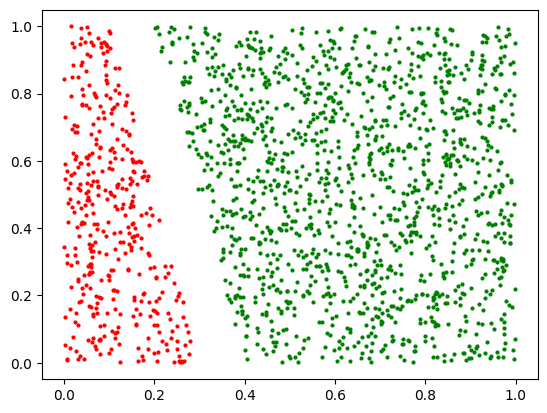

In [27]:
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        plt.scatter(md[i,0],md[i,1],c='r',s=4)
    else:
        plt.scatter(md[i,0],md[i,1],c='g',s=4)
        
plt.show()

In [28]:
#adding extra dimesion to input data

In [29]:
one = np.full(shape=(len(md),1),fill_value=1.0)
X = np.append(md,one,axis=1)
print(X.shape)

(1806, 3)


In [30]:
#preparing the labels by initially giving 1 as label to everything and then modifying it to -1 for red points

In [31]:
Y = np.full(shape=(len(md),1),fill_value=1)
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        Y[i,0]=-1
print(Y.shape)

(1806, 1)


In [32]:
#initialise w with all zeroes(data is 2d..hence 3 parametres in w)

In [33]:
W = np.array([0,0,0])
print(W)

[0 0 0]


In [34]:
#plotting data and w before training

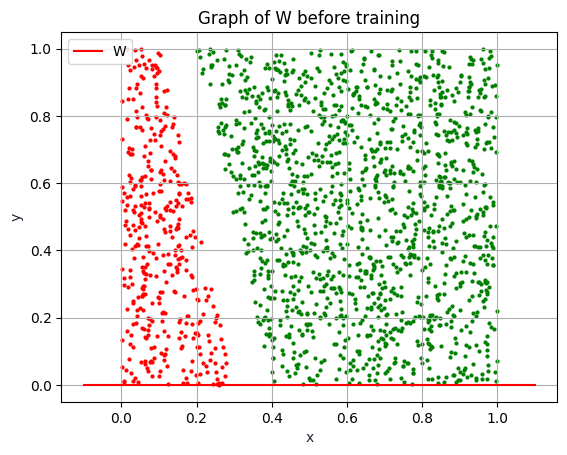

In [35]:
x = np.linspace(-0.1,1.1,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        plt.scatter(md[i,0],md[i,1],c='r',s=4)
    else:
        plt.scatter(md[i,0],md[i,1],c='g',s=4)
plt.grid()
plt.show()

In [36]:
#defining loss function:
#gives the sum of losses of all the data points with hinge loss

In [37]:
def loss(x,y,w):
    l = np.add([1],-1*y*np.dot(x,w))
    if l[0]<0:
        return 0
    else:
        return l[0]

In [38]:
#defining gradient descent algorithm
#dw denotes gradient of loss function with respect to w
#da,db,dc are partial gradients
#lr represents learning rate

In [39]:
def grad_desc(x,y,w,lr,nb_epochs_max):
    for e in range(nb_epochs_max):
        nb_changes = 0
        da = 0
        db = 0
        dc = 0
        for i in range(len(x)):
            if loss(x[i],y[i],w) != 0:
              z1 = (x[i,0]*y[i]).tolist()
              da = da - z1[0]
              z2 = (x[i,1]*y[i]).tolist()
              db = db - z2[0]
              z3 = (y[i]).tolist()
              dc = dc - z3[0]
              nb_changes = nb_changes+1
        dw = np.array([da,db,dc])
        w = np.add(w,-1*lr*dw)
        if nb_changes == 0:
            print('early stopping at epoch number %d',e+1)
            break;
    return w

In [40]:
#calling algorithm to train

In [41]:
W = grad_desc(X,Y,W,0.01,100)
print(W)

[18.21300537  3.5678724  -6.19      ]


In [42]:
#plotting data and w after training

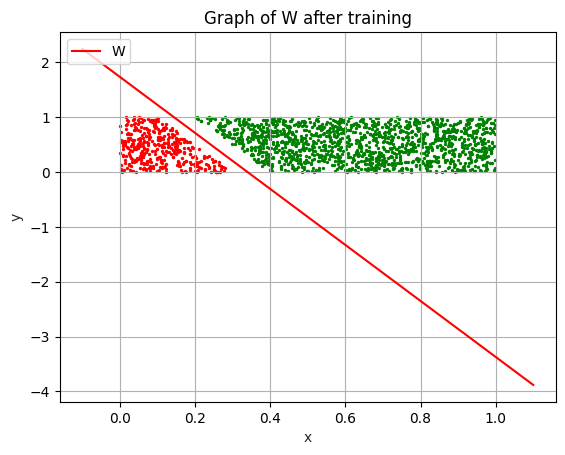

In [43]:
x = np.linspace(-0.1,1.1,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
for i in range(len(md)):
    if(10*md[i,0]+2*md[i,1]<3):
        plt.scatter(md[i,0],md[i,1],c='r',s=2)
    else:
        plt.scatter(md[i,0],md[i,1],c='g',s=2)
plt.grid()
plt.show()

# Multi Layered Perceptron

In [44]:
# computes distance between two points
def dist (point1,point2):
    sum = 0
    for i in range(len(point2)):
        sum += (point1[i] - point2[i])**2
    return np.sqrt(sum)

In [45]:
# radius of inner and outer circle of concentric circles
rad_inner = 3
rad_outer = 5

In [46]:
no_data_points_2 = np.random.randint(1000,2000)

center = [0,0] # center of the circles.

non_linear_data = np.zeros((no_data_points_2,3))

In [47]:
# generating the non-linearly sepearble data.
class_blu = 0
class_gre = 0
for i in range(no_data_points_2):

  x2 = np.random.uniform(-10,10,(2,))
  
  dist_x2 = dist(x2,center)
  
  if dist_x2 > rad_outer :
      x2 = np.append(x2,1)
      non_linear_data[i] = x2
      class_blu += 1
  elif dist_x2 < rad_inner :
      x2 = np.append(x2,-1)
      non_linear_data[i] = x2
      class_gre+=1
     
  else :
      cos_θ2 = x2[0]/np.sqrt(x2[0]**2 + x2[1]**2)
      sin_θ2 = x2[1]/np.sqrt(x2[0]**2 + x2[1]**2)
      if dist_x2 < (rad_inner + rad_outer)/2  :
         x2[0] = x2[0] - (dist_x2 - rad_inner)*cos_θ2
         x2[1] = x2[1] - (dist_x2 - rad_inner)*sin_θ2
         
         x2 = np.append(x2,-1)
         class_gre += 1
      else :
         x2[0] = x2[0] + (rad_outer - dist_x2)*cos_θ2
         x2[1] = x2[1] + (rad_outer - dist_x2)*sin_θ2
         
         x2 = np.append(x2,1)
         class_blu += 1
      non_linear_data[i] = x2

In [48]:
print("Points in class -1",class_gre)
print("Points in class  1",class_blu)

Points in class -1 228
Points in class  1 1563


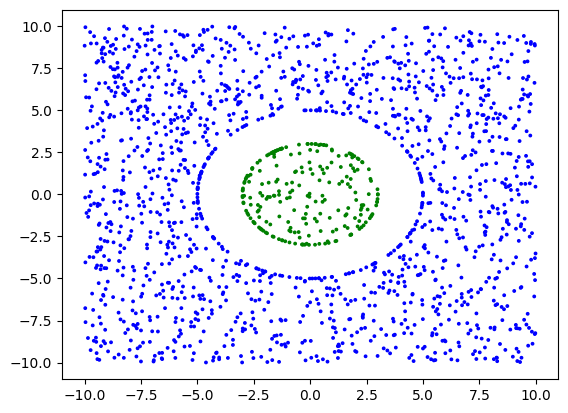

In [49]:
colors2 = ["green" if i == -1 else "blue" for i in non_linear_data[:,2]]
plt.scatter(non_linear_data[:,0],non_linear_data[:,1],c = colors2,s = 3)
plt.show()

In [50]:
# dimensions of input,hidden and output layer.
in_dim = 3 

hid_dim = 5

out_dim = 1

In [51]:
labels2 = non_linear_data[:,2]

In [52]:
def hinge_ls(x):
    
    return max(0,1-x)

In [53]:
# ReLU activation function
def ReLU (x):
    return max(0,x)

# Derivative of ReLU activation function.
def difReLU(x):
    if x > 0 :
        return 1
    else :
        return 0

# Function computes gradient of loss w.r.t weights b/w hidden and output layer.
def grad_hid_out(hid_out,label,y_pred):
   
    return -2*hid_out*label*hinge_ls(y_pred*label)

# Function computes gradient of loss w.r.t weights b/w input and hidden layer.
def grad_in_hid(input_vec,hid_in,W_hid_out,label,y_pred):
    in_dim = len(input_vec)
    hid_in = hid_in[0]
    hid_dim = len(hid_in)
    learn_value = np.zeros((in_dim,hid_dim))
    for i in range(in_dim):
        for j in range(hid_dim):   
          learn_value[i][j] = -2*label*hinge_ls(y_pred*label)*input_vec[i]*difReLU(hid_in[j])*W_hid_out[j]
    return learn_value

def Sigmoid (x):
    return 1/(1+ np.exp(-x))

vec_ReLU = np.vectorize(ReLU) 

In [54]:

η2 = 0.01 # learning rate

# Initialised the weights b/w layers.
W_in_hid = np.random.uniform(-1,1,(in_dim,hid_dim))

W_hid_out = np.random.uniform(-1,1,(hid_dim,out_dim))

W_in_hid = np.round(W_in_hid,decimals = 2)
W_hid_out = np.round(W_hid_out,decimals = 2)

In [55]:
epochs = 5

In [56]:
# Employed classical SGD for 'epochs' times pass of data.
for epoch in range(epochs):
 for i in range(no_data_points_2):
   x2 = non_linear_data[i,:2]
   
   x2 = np.append(x2,1)
   
   in_vec = x2
   
   hid_inputs = in_vec.reshape(1,3) @ W_in_hid
   
   hid_inputs = np.round(hid_inputs,decimals = 2)

   hid_outputs = vec_ReLU(hid_inputs)
    
   hid_outputs = np.round(hid_outputs,decimals = 2)
   
   output = hid_outputs @ W_hid_out
   
   output = output[0]

#   Back prop

   lr_hid_out = np.round(grad_hid_out(hid_outputs,labels2[i],output),decimals = 2)
   lr_hid_out = lr_hid_out.T
   
   lr_in_hid =  np.round(grad_in_hid(in_vec,hid_inputs,W_hid_out,labels2[i],output),decimals = 2)

   W_hid_out = W_hid_out - η2*lr_hid_out # updating the weight vector b/w hidden and output layer.
   
   W_hid_out = np.round(W_hid_out,decimals = 2) 
   
   W_in_hid =  W_in_hid - η2*lr_in_hid # updating the weight matrix b/w input and hidden layer
    
   W_in_hid =  np.round(W_in_hid,decimals = 2) 
  

In [57]:
pred_label = []
mis_clas = 0
for i in range(no_data_points_2) :
  
   x2 = non_linear_data[i,:2]
   
   x2 = np.append(x2,1)
   
   in_vec = x2
   
   hid_inputs = in_vec.reshape(1,3) @ W_in_hid

   hid_outputs = vec_ReLU(hid_inputs)
   
   output = hid_outputs @ W_hid_out
   
   output = output[0]
 
#   Testing 
   if Sigmoid(output) > 0.5 :
      output = 1
   else :
      output = -1
   if output !=labels2[i]:
       mis_clas += 1
   pred_label.append(output) 

In [58]:
accuracy = (1 - (mis_clas)/(no_data_points_2))*100
print(accuracy)

98.54829704075935


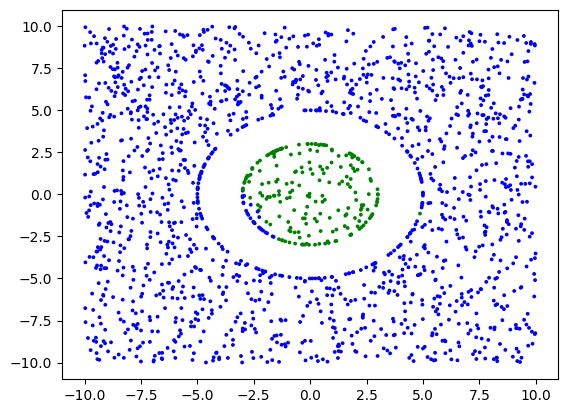

In [59]:
#  Plot of how the neural networks perfomed.
colors_pred = ["green" if i == -1 else "blue" for i in pred_label]
plt.scatter(non_linear_data[:,0],non_linear_data[:,1],c = colors_pred,s = 3)
plt.show()